# Artificial Neural Networks with Keras

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/INPT-2020/blob/master/Notebooks_DL/ANN_with_keras.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

Firstly, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [62]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [63]:
import tensorflow as tf
from tensorflow import keras

In [64]:
tf.__version__

'2.8.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [65]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [66]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [67]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [68]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

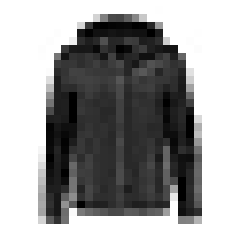

In [69]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [70]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [71]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [72]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [73]:
X_valid.shape

(5000, 28, 28)

In [74]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

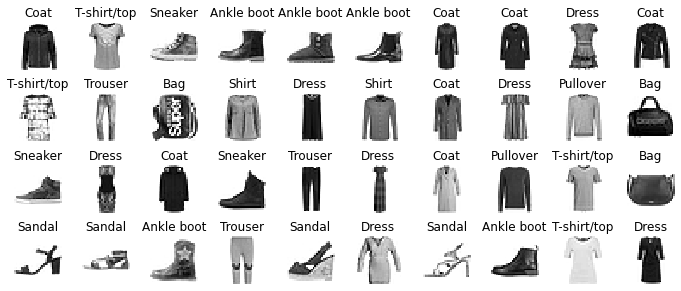

In [75]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Construct a Model

In [76]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [77]:
keras.backend.clear_session()
np.random.seed(42)

### or using the folowing method

In [78]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [79]:
model.layers

In [80]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [81]:
#keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [82]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [83]:
model.get_layer(hidden1.name) is hidden1

True

In [84]:
weights, biases = hidden1.get_weights()

In [85]:
weights

array([[-0.05574259, -0.01186311,  0.05151691, ..., -0.00874624,
        -0.05002768, -0.02664211],
       [-0.00773731,  0.05381887,  0.0303122 , ..., -0.05539129,
        -0.02485396, -0.02313227],
       [ 0.03723378,  0.04244777,  0.03598973, ..., -0.01279277,
        -0.02177295,  0.03539483],
       ...,
       [-0.06486087, -0.01097253, -0.02756424, ...,  0.02063312,
        -0.02660449, -0.03871808],
       [-0.03881601,  0.03862345, -0.01904861, ...,  0.01071651,
        -0.02817538,  0.03289616],
       [-0.0327121 , -0.06779202, -0.05154596, ...,  0.058515  ,
        -0.06215936,  0.06413589]], dtype=float32)

In [86]:
weights.shape

(784, 300)

In [87]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [88]:
biases.shape

(300,)

### Compile the Model
Here you can chose the loss function, the optimizer, the performance metric, etc. check Keras documentation for further details.

In [89]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

### Train the model
Here you can chose how many epochs you need and the batch size.

In [90]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7109 - accuracy: 0.7664 - val_loss: 0.5039 - val_accuracy: 0.8348
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4862 - accuracy: 0.8306 - val_loss: 0.4467 - val_accuracy: 0.8508
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4418 - accuracy: 0.8455 - val_loss: 0.4200 - val_accuracy: 0.8614
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4148 - accuracy: 0.8541 - val_loss: 0.3949 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3936 - accuracy: 0.8613 - val_loss: 0.3990 - val_accuracy: 0.8566
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3773 - accuracy: 0.8663 - val_loss: 0.3888 - val_accuracy: 0.8614
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3633 - accuracy: 0.8710 - val_loss: 0.3746 - val_accuracy:

In [91]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [92]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [93]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot learning Curves

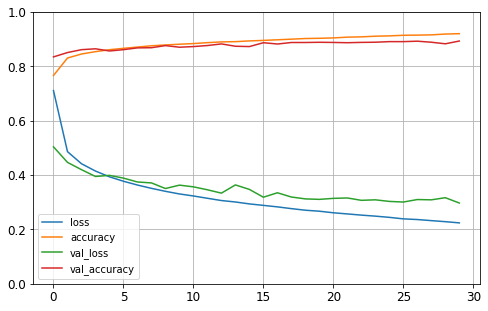

In [94]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [95]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3213 - accuracy: 0.8865


[0.32129546999931335, 0.8865000009536743]

In [96]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [101]:
# y_pred = model.predict_classes(X_new)
# y_pred

In [100]:
# np.array(class_names)[y_pred]

In [ ]:
# y_new = y_test[:3]
# y_new

In [ ]:
# plt.figure(figsize=(7.2, 2.4))
# for index, image in enumerate(X_new):
#     plt.subplot(1, 3, index + 1)
#     plt.imshow(image, cmap="binary", interpolation="nearest")
#     plt.axis('off')
#     plt.title(class_names[y_test[index]], fontsize=12)
# plt.subplots_adjust(wspace=0.2, hspace=0.5)
# plt.show()

## Exercise

#### 1) Plot Learning curves when using different optimizers
#### 2) Plot Learning curves when using different batch size
#### 3) Plot Learning curves when using different number of epochs
#### 4) Add additional neurons and use Dropout Layer. Plot Learning curves.
#### 5) Use Batch Normalisation
#### 6) repeat with more layers
#### 7) apply on different datasets

### 1- optimizers

- rmsprop

In [38]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [39]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="rmsprop",
              metrics=["accuracy"])

In [40]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.5072 - accuracy: 0.8165 - val_loss: 0.4563 - val_accuracy: 0.8506
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3890 - accuracy: 0.8620 - val_loss: 0.3815 - val_accuracy: 0.8720
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3671 - accuracy: 0.8706 - val_loss: 0.4151 - val_accuracy: 0.8706
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3540 - accuracy: 0.8767 - val_loss: 0.3849 - val_accuracy: 0.8704
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3473 - accuracy: 0.8810 - val_loss: 0.4241 - val_accuracy: 0.8676
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3397 - accuracy: 0.8845 - val_loss: 0.4438 - val_accuracy: 0.8722
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3379 - accuracy: 0.8873 - val_loss: 0.4430 - val_accurac

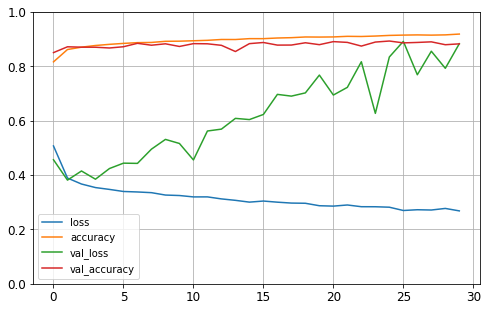

In [41]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

* adam

In [42]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [43]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
              metrics=["accuracy"])

In [44]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4855 - accuracy: 0.8254 - val_loss: 0.4058 - val_accuracy: 0.8528
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3644 - accuracy: 0.8653 - val_loss: 0.3463 - val_accuracy: 0.8744
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3290 - accuracy: 0.8777 - val_loss: 0.3358 - val_accuracy: 0.8766
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3027 - accuracy: 0.8880 - val_loss: 0.3405 - val_accuracy: 0.8728
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2858 - accuracy: 0.8938 - val_loss: 0.3280 - val_accuracy: 0.8780
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2708 - accuracy: 0.8987 - val_loss: 0.3114 - val_accuracy: 0.8878
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2588 - accuracy: 0.9022 - val_loss: 0.3009 - val_accuracy:

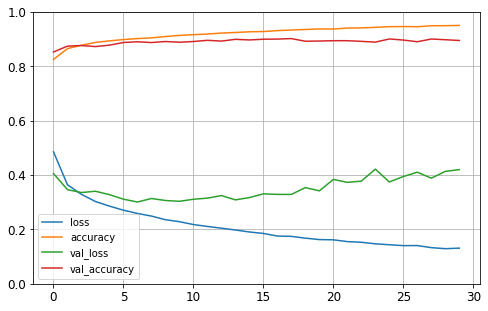

In [45]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### batch_size

- batch-size=24

In [46]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [47]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
              metrics=["accuracy"])

In [48]:
history = model.fit(X_train, y_train, batch_size=24, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
2292/2292 [==============================] - 9s 4ms/step - loss: 0.6688 - accuracy: 0.7783 - val_loss: 0.5560 - val_accuracy: 0.8116
Epoch 2/30
2292/2292 [==============================] - 8s 3ms/step - loss: 0.4685 - accuracy: 0.8355 - val_loss: 0.4812 - val_accuracy: 0.8334
Epoch 3/30
2292/2292 [==============================] - 9s 4ms/step - loss: 0.4243 - accuracy: 0.8509 - val_loss: 0.4303 - val_accuracy: 0.8468
Epoch 4/30
2292/2292 [==============================] - 8s 4ms/step - loss: 0.3971 - accuracy: 0.8608 - val_loss: 0.3937 - val_accuracy: 0.8632
Epoch 5/30
2292/2292 [==============================] - 9s 4ms/step - loss: 0.3784 - accuracy: 0.8661 - val_loss: 0.3721 - val_accuracy: 0.8712
Epoch 6/30
2292/2292 [==============================] - 8s 3ms/step - loss: 0.3619 - accuracy: 0.8716 - val_loss: 0.3683 - val_accuracy: 0.8658
Epoch 7/30
2292/2292 [==============================] - 9s 4ms/step - loss: 0.3480 - accuracy: 0.8765 - val_loss: 0.3555 - val_accuracy:

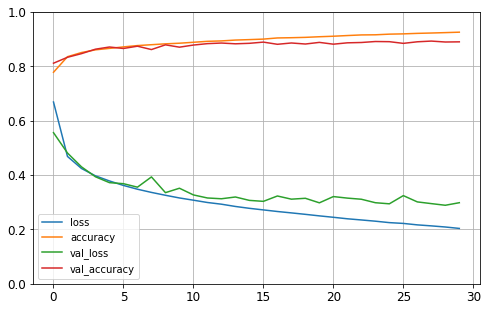

In [49]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

- batch-size=40

In [50]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [51]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
              metrics=["accuracy"])

In [52]:
history = model.fit(X_train, y_train, batch_size=40, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1375/1375 [==============================] - 7s 5ms/step - loss: 0.7437 - accuracy: 0.7582 - val_loss: 0.5147 - val_accuracy: 0.8260
Epoch 2/30
1375/1375 [==============================] - 6s 4ms/step - loss: 0.4978 - accuracy: 0.8281 - val_loss: 0.4546 - val_accuracy: 0.8502
Epoch 3/30
1375/1375 [==============================] - 7s 5ms/step - loss: 0.4514 - accuracy: 0.8417 - val_loss: 0.4335 - val_accuracy: 0.8484
Epoch 4/30
1375/1375 [==============================] - 6s 4ms/step - loss: 0.4233 - accuracy: 0.8518 - val_loss: 0.4084 - val_accuracy: 0.8618
Epoch 5/30
1375/1375 [==============================] - 6s 4ms/step - loss: 0.4045 - accuracy: 0.8579 - val_loss: 0.3857 - val_accuracy: 0.8666
Epoch 6/30
1375/1375 [==============================] - 6s 5ms/step - loss: 0.3883 - accuracy: 0.8641 - val_loss: 0.3937 - val_accuracy: 0.8638
Epoch 7/30
1375/1375 [==============================] - 6s 5ms/step - loss: 0.3759 - accuracy: 0.8658 - val_loss: 0.3824 - val_accuracy:

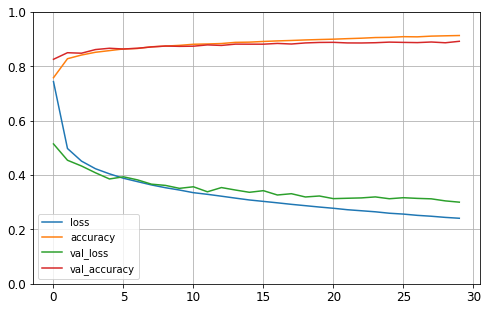

In [53]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### epochs

- epochs=10

In [54]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [55]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
              metrics=["accuracy"])

In [56]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7313 - accuracy: 0.7621 - val_loss: 0.5179 - val_accuracy: 0.8258
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4946 - accuracy: 0.8263 - val_loss: 0.4421 - val_accuracy: 0.8502
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4494 - accuracy: 0.8424 - val_loss: 0.4089 - val_accuracy: 0.8582
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4201 - accuracy: 0.8523 - val_loss: 0.4138 - val_accuracy: 0.8548
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4003 - accuracy: 0.8593 - val_loss: 0.3941 - val_accuracy: 0.8630
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3856 - accuracy: 0.8646 - val_loss: 0.3765 - val_accuracy: 0.8704
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3715 - accuracy: 0.8683 - val_loss: 0.3948 - val_accuracy:

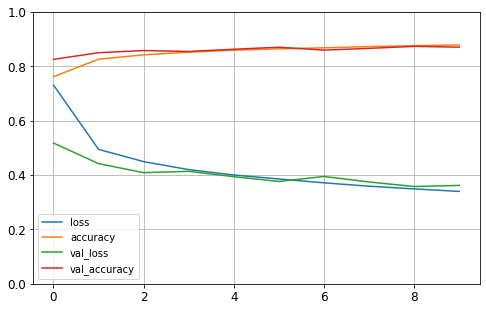

In [57]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

- epochs=40

In [58]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [59]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
              metrics=["accuracy"])

In [60]:
history = model.fit(X_train, y_train, batch_size=32, epochs=40,
                    validation_data=(X_valid, y_valid))

Epoch 1/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7177 - accuracy: 0.7663 - val_loss: 0.5339 - val_accuracy: 0.8066
Epoch 2/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4875 - accuracy: 0.8303 - val_loss: 0.4704 - val_accuracy: 0.8424
Epoch 3/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4409 - accuracy: 0.8448 - val_loss: 0.4103 - val_accuracy: 0.8592
Epoch 4/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4135 - accuracy: 0.8555 - val_loss: 0.4030 - val_accuracy: 0.8574
Epoch 5/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3934 - accuracy: 0.8605 - val_loss: 0.3864 - val_accuracy: 0.8674
Epoch 6/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3773 - accuracy: 0.8670 - val_loss: 0.3717 - val_accuracy: 0.8708
Epoch 7/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3642 - accuracy: 0.8710 - val_loss: 0.3830 - val_accuracy:

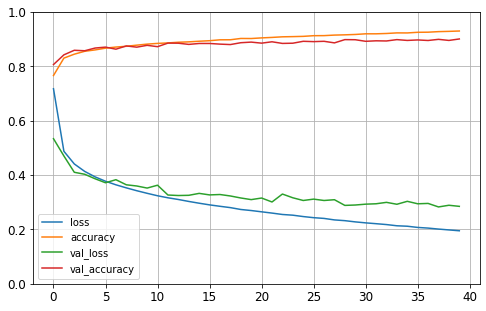

In [61]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()